## Predict gene knockout strategies

### Import the required libraries and the model.

In [ ]:
from cobra.io import read_sbml_model
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
from cameo import phenotypic_phase_plane
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design.deterministic.linear_programming import OptKnock
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()
import matplotlib.pyplot as plt
%matplotlib inline


model = read_sbml_model('2018_ATCC1015_GSM_iJB1325.xml') #The model is refered from (Brandl, J., Aguilar-Pontes, M. V., Schape, P., Norregaard, A., Arvas, M., Ram, A. F. J., Meyer, V., Tsang, A., de Vries, R. P., & Andersen, M. R. (2018). A community-driven reconstruction of the Aspergillus niger metabolic network. Fungal Biology and Biotechnology, 5, 16. )

### Media setup

In [9]:
#Add extracellular metanolites
PNTOe = Metabolite('PNTOe', formula='C9H17NO5', name='(R)-Pantothenate', compartment='e') 
model.add_metabolites([PNTOe])

DHFe = Metabolite('DHFe', formula='C19H21N7O6', name='7,8-Dihydrofolate', compartment='e') 
model.add_metabolites([DHFe])

PABAe = Metabolite('PABAe', formula='C7H7NO2', name='4-Aminobenzoate', compartment='e') 
model.add_metabolites([PABAe])

PLe = Metabolite('PLe', formula='C8H9NO3', name='Pyridoxal', compartment='e') 
model.add_metabolites([PLe])

RIBOFLAVe = Metabolite('RIBOFLAVe', formula='C17H20N4O6', name='Riboflavin', compartment='e') 
model.add_metabolites([RIBOFLAVe])

#Add transport reactions
r2392 = Reaction('r2392')
r2392.name = '(R)-Pantothenate transport'
r2392.subsystem = "Transport"
r2392.lower_bound = -1000
r2392.add_metabolites({PNTOe: -1.0, model.metabolites.PNTO: 1.0})

r2393 = Reaction('r2393')
r2393.name = '7,8-Dihydrofolate transport'
r2393.lower_bound = -1000
r2393.subsystem = 'Transport'
r2393.add_metabolites({DHFe: -1.0, model.metabolites.DHF: 1.0})

r2394 = Reaction('r2394')
r2394.name = '4-Aminobenzoate transport'
r2394.lower_bound = -1000
r2394.subsystem = 'Transport'
r2394.add_metabolites({PABAe: -1.0, model.metabolites.PABA: 1.0})

r2395 = Reaction('r2395')
r2395.name = 'Pyridoxal transport'
r2395.lower_bound = -1000
r2395.subsystem = 'Transport'
r2395.add_metabolites({PLe: -1.0, model.metabolites.PL: 1.0})

r2396 = Reaction('r2396')
r2396.name = 'Riboflavin transport'
r2396.lower_bound = -1000
r2396.subsystem = 'Transport'
r2396.add_metabolites({RIBOFLAVe: -1.0, model.metabolites.RIBOFLAV: 1.0})

r2397 = Reaction('r2397')
r2397.name = 'Copper transport'
r2397.lower_bound = -1000
r2397.subsystem = 'Transport'
r2397.add_metabolites({model.metabolites.CUe: -1.0, model.metabolites.CU: 1.0})

#Add boundary conditions
model.add_boundary(model.metabolites.PNTOe, type="exchange", reaction_id= "BOUNDARY_PNTOe")
model.add_boundary(model.metabolites.DHFe, type="exchange", reaction_id= "BOUNDARY_DHFe")
model.add_boundary(model.metabolites.PABAe, type="exchange", reaction_id= "BOUNDARY_PABAe")
model.add_boundary(model.metabolites.PLe, type="exchange", reaction_id= "BOUNDARY_PLe")
model.add_boundary(model.metabolites.RIBOFLAVe, type="exchange", reaction_id= "BOUNDARY_RIBOFLAVe")
model.add_boundary(model.metabolites.CUe, type="exchange", reaction_id= "BOUNDARY_CUe")

medium_blank = {key: 0 for key in model.medium}
YESmedium = medium_blank # Setup the object for YESmedium

#Set the concentration for the amino acids
YESmedium['BOUNDARY_GLCe'] = 20 
# YESmedium['BOUNDARY_ALAe'] = 10
YESmedium['BOUNDARY_ARGe'] = 10
# YESmedium['BOUNDARY_ASPe'] = 10
# YESmedium['BOUNDARY_CYSe'] = 10
# YESmedium['BOUNDARY_GLUe'] = 10
# YESmedium['BOUNDARY_GLYe'] = 10
# YESmedium['BOUNDARY_HISe'] = 10
# YESmedium['BOUNDARY_ILEe'] = 10
# YESmedium['BOUNDARY_LEUe'] = 10
# YESmedium['BOUNDARY_LYSe'] = 10
# YESmedium['BOUNDARY_METe'] = 10
# YESmedium['BOUNDARY_PHEe'] = 10
# YESmedium['BOUNDARY_PROe'] = 10
# YESmedium['BOUNDARY_SERe'] = 10
# YESmedium['BOUNDARY_THRe'] = 10
# YESmedium['BOUNDARY_TRPe'] = 10
# YESmedium['BOUNDARY_TYRe'] = 10
# YESmedium['BOUNDARY_VALe'] = 10

#Set the concentration for the supplements
YESmedium['BOUNDARY_NH4e'] = 5 #Ammonium  
YESmedium['BOUNDARY_SLFe'] = 5.5 #Sulfate
YESmedium['BOUNDARY_BTe'] = 2/10**6 #Biotin 
YESmedium['BOUNDARY_PNTOe'] = 400/10**6 #Pantothenic Acid
YESmedium['BOUNDARY_DHFe'] = 2/10**6 #Folic acid
YESmedium['BOUNDARY_MYOIe'] = 4000/10**6 #myo-Inositol
YESmedium['BOUNDARY_NICAe'] = 800/10**6 #Nicotinate
YESmedium['BOUNDARY_PABAe'] = 400/10**6 #4-Aminobenzoate
YESmedium['BOUNDARY_PLe'] = 800/10**6 #Pyridoxal
YESmedium['BOUNDARY_RIBOFLAVe'] = 200/10**6 #Riboflavin
YESmedium['BOUNDARY_THIAe'] = 800/10**6 #Thiamine
YESmedium['BOUNDARY_CUe'] = 80/10**6 #Copper
YESmedium['BOUNDARY_Ke'] = 2 #Potassium
YESmedium['BOUNDARY_FE2e'] = 200/10**6 #Ferric 
YESmedium['BOUNDARY_MNe'] = 400/10**6 #Manganese
YESmedium['BOUNDARY_MOe'] = 200/10**6 #Molybdate
YESmedium['BOUNDARY_ZNe'] = 400/10**6 #Zinc
YESmedium['BOUNDARY_PIe'] = 1 #Phosphate
YESmedium['BOUNDARY_CAe'] = 0.4 #Calcium 

#Set the condition
YESmedium['BOUNDARY_H2Oe'] = 1000 #Water
YESmedium['BOUNDARY_O2e'] = 1000 #Oxygen 

# Setting YES as control medium
model.medium = YESmedium

model.reactions.BOUNDARY_GLCe.bonds = -20,1000

### Phenotpic phase plane (Wildtype)

In [10]:
#Analysis
wt_solution = model.optimize()
growth = wt_solution.fluxes["DRAIN_Biomass"]
yanD_production = wt_solution.fluxes["r1976"]
yanD = phenotypic_phase_plane(model, variables=['DRAIN_Biomass'], objective='r1976')

In [ ]:
#Visualization
yanD.plot(plotter, points=[(growth, yanD_production)])

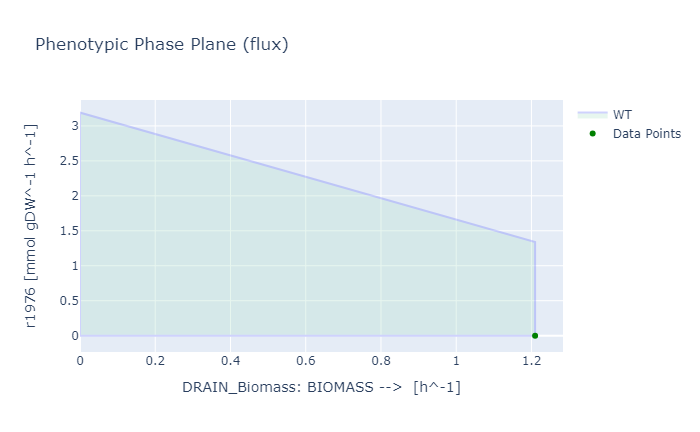

In [12]:
from IPython.display import Image

Image(filename='WT.png')

### OptGene

OptGene significantly reduces computational time, enabling the resolution of larger problems due to the combinatorial nature of enzyme deletions in relation to the problem size. Additionally, it optimizes non-linear objective functions, like productivity, crucial in various commercial applications. (Patil, Rocha, Förster, & Nielsen, 2005).

In [ ]:
#Analysis
optgene = OptGene(model)

result = optgene.run(target=model.reactions.r1976,
                     biomass=model.reactions.DRAIN_Biomass,
                     substrate=model.metabolites.GLCe,
                     max_evaluations=5000,
                     plot=False)

In [16]:
#Look into result of Optgene
result #No result found

No solutions found


,reactions,genes,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness


### OptKnock

OptKnock suggests gene deletion strategies leading to the overproduction of a pre-specified metabolite using the provided metabolic model. A nested optimization framework identifies the gene deletions by coupling the production of the desired product with biomass formation.

In [ ]:
#Analysis
optknock = OptKnock(model, fraction_of_optimum=0.1)
result = optknock.run(max_knockouts=1, target="r1976", biomass="DRAIN_Biomass")

In [15]:
#Look into result of Optknock
result

HBox()

,reactions,size,r1976,biomass,fva_min,fva_max
0,{r545},1,2.607173,0.380952,0.0,2.613003


In [ ]:
#Visualization
result.plot(plotter)

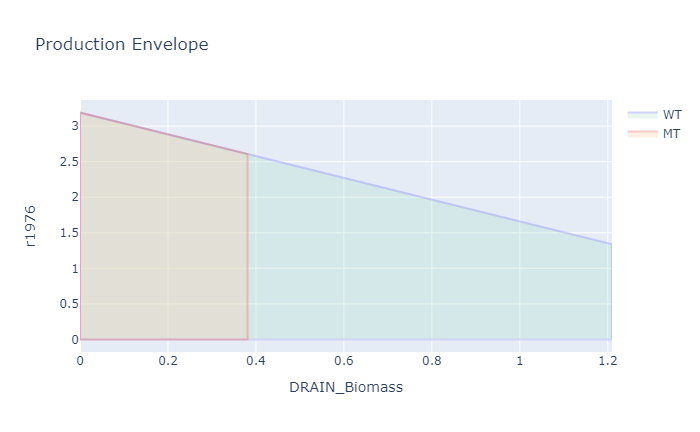

In [17]:
from IPython.display import Image

Image(filename='Optknock.png')